In [1]:
!pip install git+https://github.com/python-graphblas/python-graphblas

  Cloning https://github.com/python-graphblas/python-graphblas to /tmp/pip-req-build-j6c_p_by
  Running command git clone --filter=blob:none --quiet https://github.com/python-graphblas/python-graphblas /tmp/pip-req-build-j6c_p_by
  Resolved https://github.com/python-graphblas/python-graphblas to commit 27b23e414a9a73daa9c3dda9698e227562d9a18c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 MB 12.1 MB/s eta 0:00:00
  Created wheel for python-graphblas: filename=python_graphblas-2024.2.0+2.g27b23e41-py3-none-any.whl size=351142 sha256=0dd06967a5699ee2f53ef2f3236f61b806dfc23b5bd102883a3f3261b50e35d6
  Stored in directory: /tmp/pip-ephem-wheel-cache-bktc6kh9/wheels/1d/ff/e1/7abbc85fde1376805d105bcb709a635cac5d6fcf1cc6f7d3ad
Successfully built python-graphblas


In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import graphblas as gb
from graphblas import Matrix, Vector, Scalar
from graphblas import dtypes
from graphblas import unary, binary, monoid, semiring
from graphblas.io import mmread

In [80]:
def PageRank(M): #реализация первой формулы с лекции через ri, rj
  M << M.apply(unary.one)
  #задаю начальные значения параметров
  N=M.nrows
  beta=0.85
  maxrange=100
  maxtol=1e-4
  ri = Vector(dtypes.FP32, N)
  rj = Vector(dtypes.FP32, N)
  #начальная инициализация как 1/N
  rj[:] << 1.0/N
  rdiff=1
  #рассчитываю beta/di, т.к. это константа
  bd=M.reduce_rowwise(monoid.plus).new().dup(dtype="FP32")
  bd(accum=binary.truediv)[:] << beta
  for i in range(maxrange):
    if rdiff <= maxtol:
      break
    ri=rj
    #реализация формулы
    #умножение на матрицу реализует сумму по наличию ребер между вершинами
    #далее часть с beta и d, рассчитанная ранее
    #далее часть с учетом перехода на случайную вершину
    rj=M.T.mxv(ri.ewise_mult(bd, binary.truediv), semiring.plus_second)+(1-beta)/N
    #расчет разницы между векторами rj, ri
    rdiff=abs(rj-ri).reduce(monoid.plus)
  return rj


Тестирование на графе с практики

In [81]:
A = Matrix.from_coo(
    [0, 0, 1, 2, 2, 3, 4],
    [1, 2, 3, 3, 4, 4, 0],
    [1.1, 9.8, 4.2, 7.1, 0.2, 6.9, 2.2],
)
A

"M_2244"   nvals  nrows  ncols  dtype   format
gb.Matrix      7      5      5   FP64  bitmapr
----------------------------------------------
     0    1    2    3    4
0       1.1  9.8          
1                 4.2     
2                 7.1  0.2
3                      6.9
4  2.2

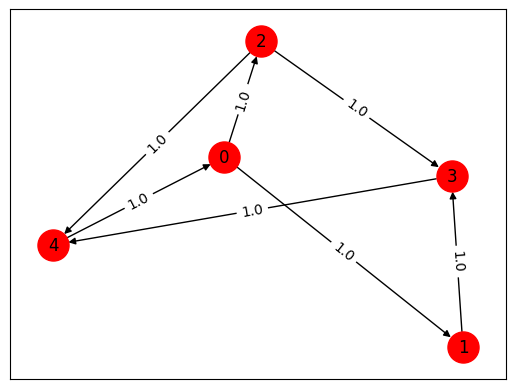

In [79]:
gb.viz.draw(A)

In [82]:
PageRank(A)

gb.VectorExpression                                          size  dtype
v_1543.apply(binary.plus[FP64], right=0.030000000000000006)     5   FP64

"Result"   nvals  size  dtype
gb.Vector      5     5   FP64
-----------------------------
index         0         1         2         3         4
value  0.254213  0.138031  0.138031  0.205973  0.263752

Do expr.new() or other << expr to calculate the expression.

Можно отметить, что результат - тот же 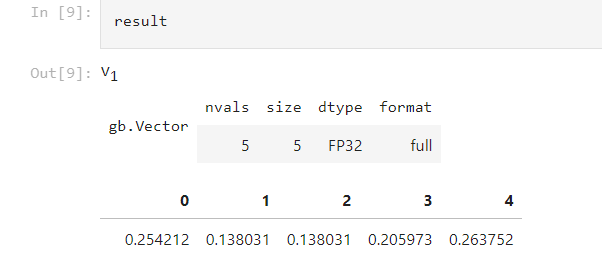